In [1]:
import cv2 as cv

In [2]:
import matplotlib.pyplot as plt

In [273]:
maze = cv.imread('maze_1.png', 0)


In [274]:
maze_original = maze.copy()

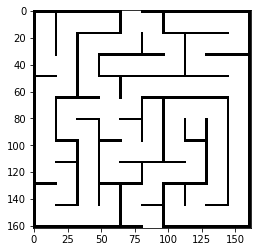

In [275]:
plt.imshow(maze, cmap = 'gray')

In [149]:
maze = cv.erode(maze, cv.getStructuringElement(cv.MORPH_RECT, (3,3)))

In [138]:
cv.getStructuringElement(cv.MORPH_RECT, (2,2))

array([[1, 1],
       [1, 1]], dtype=uint8)

In [139]:
cv.getStructuringElement(cv.MORPH_DILATE,(2,2))

array([[0, 1],
       [1, 1]], dtype=uint8)

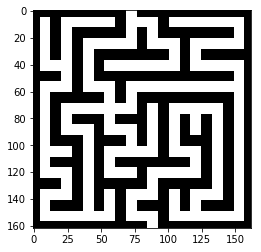

In [150]:
plt.imshow(maze, cmap = 'gray')

In [276]:
obstacles = np.where(maze==0)

In [277]:
test = np.ones_like(maze)
test[obstacles] = 0

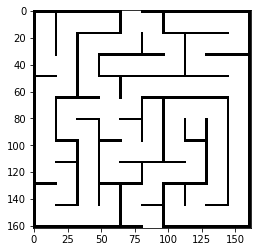

In [278]:
plt.imshow(test, cmap = 'gray')

In [280]:
distance_transform = cv.distanceTransform(test, cv.DIST_L2, cv.DIST_MASK_PRECISE)

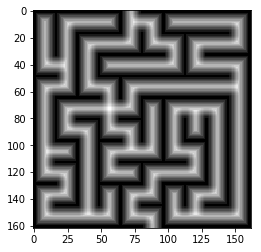

In [281]:
plt.imshow(distance_transform, cmap = 'gray')

In [282]:
distance_transform.min()

0.0

([array([162.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([162.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  8., 154.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  8.,   6., 148.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  8.,   6.,   6., 142.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  8.,   6.,   6.,   6., 136.,   0.,   0.,   0.,   0.,   0.]),
  array([  8.,   6.,   6.,   6.,   6., 130.,   0.,   0.,   0.,   0.]),
  array([  8.,   6.,   6.,   6.,   6.,   6., 124.,   0.,   0.,   0.]),
  array([  8.,   6.,   6.,   6.,   6.,   6.,   6., 118.,   0.,   0.]),
  array([ 8.,  6.,  6.,  6.,  6.,  6.,  6., 90., 28.,  0.]),
  array([ 8.,  6.,  6.,  6.,  6.,  6., 91., 19., 12.,  2.]),
  array([ 8.,  6.,  6.,  6.,  6., 92., 12., 19.,  7.,  0.]),
  array([ 8.,  6.,  6.,  6., 86., 19., 12., 12.,  7.,  0.]),
  array([ 8.,  6.,  6., 87., 12., 19., 12., 12.,  0.,  0.]),
  array([ 8.,  6., 88., 12., 12., 12., 12., 12.,  0.,  0

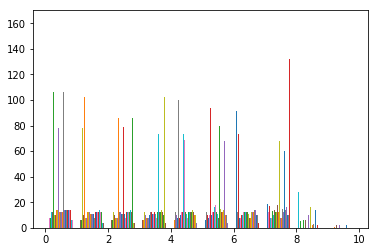

In [203]:
plt.hist(distance_transform)

In [283]:
graph_cells = np.where(distance_transform>= 7)

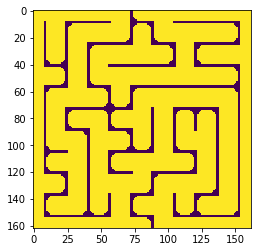

In [284]:
graph_image = np.ones_like(maze)
graph_image[graph_cells] = 0
plt.imshow(graph_image)

In [222]:
np.where(graph_image[0] == 0)

(array([72, 73]),)

In [214]:
test.max()

255

In [216]:
plt.imsave('test_dist_transf', test, cmap = 'gray')

In [217]:
from d_star_class import D_Star
from graph_maze import graph_maze

In [218]:
graph = graph_maze(graph_image)

In [220]:
graph.edges()

[{(0, 73), (1, 72)},
 {(0, 72), (0, 73)},
 {(0, 73), (1, 73)},
 {(0, 72), (1, 72)},
 {(0, 72), (1, 73)},
 {(1, 72), (2, 73)},
 {(1, 72), (2, 72)},
 {(1, 72), (1, 73)},
 {(1, 73), (2, 73)},
 {(1, 73), (2, 72)},
 {(2, 72), (2, 73)},
 {(2, 72), (3, 72)},
 {(2, 72), (3, 73)},
 {(2, 73), (3, 72)},
 {(2, 73), (3, 73)},
 {(3, 72), (4, 73)},
 {(3, 72), (4, 72)},
 {(3, 72), (3, 73)},
 {(3, 73), (4, 73)},
 {(3, 73), (4, 72)},
 {(4, 72), (5, 73)},
 {(4, 72), (4, 73)},
 {(4, 72), (5, 72)},
 {(4, 73), (5, 73)},
 {(4, 73), (5, 74)},
 {(4, 73), (5, 72)},
 {(5, 72), (5, 73)},
 {(5, 72), (6, 73)},
 {(5, 72), (6, 72)},
 {(5, 73), (6, 73)},
 {(5, 73), (5, 74)},
 {(5, 73), (6, 72)},
 {(5, 73), (6, 74)},
 {(5, 74), (6, 73)},
 {(5, 74), (6, 75)},
 {(5, 74), (6, 74)},
 {(6, 72), (6, 73)},
 {(6, 72), (7, 72)},
 {(6, 72), (7, 73)},
 {(6, 73), (6, 74)},
 {(6, 73), (7, 74)},
 {(6, 73), (7, 72)},
 {(6, 73), (7, 73)},
 {(6, 74), (6, 75)},
 {(6, 74), (7, 74)},
 {(6, 74), (7, 75)},
 {(6, 74), (7, 73)},
 {(6, 75), (7

In [270]:
d_star = D_Star(graph)

In [228]:
import random

In [266]:
start = random.choice(graph.vertices())

goal = random.choice(graph.vertices())

In [267]:
start == goal

False

In [268]:
print(start)
print(goal)

(24, 45)
(153, 130)


In [271]:
no_path = False
planned_path_image = np.zeros_like(graph_image)
final_path_image = np.zeros_like(graph_image)
d_star.insert(goal,0)
d_star.backpointer[goal] = goal

while d_star.tag[start]!='Closed':
    if d_star.get_kmin() == -1:
        print("There's no path")
        no_path = True
        break
    else:
        d_star.process_state(info=True)
if d_star.h[start]>=1000:
    print("There's no path")

    
if no_path == False:
    path = [start]
    position = start
    while position != goal:
        next_position = d_star.backpointer[position]
        path.append(next_position)
        position = next_position
    print('The planned path is: {}'.format(start), end = ' ')
    for pos in path[1:]:
        print("-> {}".format(pos),end = ' ')

for p in path:
    planned_path_image[p] = 255
plt.imsave('previous_path', planned_path_image)
        
if no_path == False:
    print('\n\nChecking the planned path')
    path = [start]
    position = start
    while position != goal:
        next_position = d_star.backpointer[position]
        #f = lambda x: True if x=='y' else False
        #reading = f(input('Is there an obstacle when moving from {} to {}? (y/n)\n'.format(position,next_position)))
        reading = np.random.choice(np.array([True,False]), p = np.array([0.4,0.6]) )
        if reading:
            changed = d_star.perceive(position,1000)
        else:
            changed = False
        if changed: # should be read from the sensors
            print('Obstacle found!')
            d_star.modify_cost(next_position,position,1000)
            while d_star.h[position]>d_star.get_kmin():
                print('looking for obstacles')
                k_min = d_star.process_state(info=True)
                if k_min==-1:
                    print('Fuck, there are no paths')
                    break
        else:
            position = d_star.backpointer[position]
            path.append(position)

    if d_star.h[start]>=1000:
        print("There's no path")
    else:          
        print('The travelled path was: {}'.format(start), end = ' ')
        for pos in path[1:]:
            print("-> {}".format(pos),end = ' ')

        path = [start]
        position = start
        while position != goal:
            next_position = d_star.backpointer[position]
            path.append(next_position)
            position = next_position
        print('\n\nThe new planned path is: {}'.format(start), end = ' ')
        for pos in path[1:]:
            print("-> {}".format(pos),end = ' ')
for p in path:
    final_path_image[p] = 255
plt.imsave('final_path',final_path_image)
plt.imshow(final_path_image)



Position
(153, 130)

Open list
[[1, (152, 130)], [1, (153, 129)], [1, (153, 131)], [1.4, (152, 129)], [1.4, (152, 131)]]

key value function
0

tags
Closed

h value function
0

k_old: 0

Backpointers
(153, 130)

Position
(152, 130)

Open list
[[1, (153, 129)], [1, (153, 131)], [1.4, (152, 129)], [1.4, (152, 131)]]

key value function
1

tags
Closed

h value function
1

k_old: 1

Backpointers
(153, 130)

Position
(153, 129)

Open list
[[1, (153, 131)], [1.4, (152, 129)], [1.4, (152, 131)], [2, (153, 128)], [2.4, (152, 128)]]

key value function
1

tags
Closed

h value function
1

k_old: 1

Backpointers
(153, 130)

Position
(153, 131)

Open list
[[1.4, (152, 129)], [1.4, (152, 131)], [2, (153, 128)], [2, (153, 132)], [2.4, (152, 128)], [2.4, (152, 132)]]

key value function
1

tags
Closed

h value function
1

k_old: 1

Backpointers
(153, 130)

Position
(152, 129)

Open list
[[1.4, (152, 131)], [2, (153, 128)], [2, (153, 132)], [2.4, (152, 128)], [2.4, (152, 132)]]

key value function
1.


k_old: 27.199999999999996

Backpointers
(151, 105)

Position
(145, 153)

Open list
[[27.599999999999994, (137, 129)], [27.599999999999994, (149, 104)], [27.999999999999993, (136, 129)], [27.999999999999993, (144, 152)], [27.999999999999993, (147, 105)], [27.999999999999993, (148, 104)], [28.39999999999999, (144, 153)], [28.39999999999999, (147, 104)]]

key value function
27.39999999999999

tags
Closed

h value function
27.39999999999999

k_old: 27.39999999999999

Backpointers
(146, 152)

Position
(137, 129)

Open list
[[27.599999999999994, (149, 104)], [27.999999999999993, (136, 129)], [27.999999999999993, (144, 152)], [27.999999999999993, (147, 105)], [27.999999999999993, (148, 104)], [28.39999999999999, (144, 153)], [28.39999999999999, (147, 104)], [28.599999999999994, (137, 130)], [28.999999999999993, (136, 130)]]

key value function
27.599999999999994

tags
Closed

h value function
27.599999999999994

k_old: 27.599999999999994

Backpointers
(137, 128)

Position
(149, 104)

Open li

49.59999999999999

tags
Closed

h value function
49.59999999999999

k_old: 49.59999999999999

Backpointers
(120, 136)

Position
(119, 137)

Open list
[[49.99999999999999, (122, 152)], [50.39999999999999, (122, 153)], [50.59999999999999, (118, 136)], [50.999999999999986, (118, 137)]]

key value function
49.999999999999986

tags
Closed

h value function
49.999999999999986

k_old: 49.999999999999986

Backpointers
(120, 136)

Position
(122, 152)

Open list
[[50.39999999999999, (122, 153)], [50.59999999999999, (118, 136)], [50.999999999999986, (118, 137)], [50.99999999999999, (121, 152)], [51.39999999999999, (121, 153)]]

key value function
49.99999999999999

tags
Closed

h value function
49.99999999999999

k_old: 49.99999999999999

Backpointers
(123, 152)

Position
(122, 153)

Open list
[[50.59999999999999, (118, 136)], [50.999999999999986, (118, 137)], [50.99999999999999, (121, 152)], [51.39999999999999, (121, 153)]]

key value function
50.39999999999999

tags
Closed

h value function
50.

95.4

k_old: 95.4

Backpointers
(75, 135)

Position
(73, 136)

Open list
[[95.8, (77, 152)], [95.80000000000001, (74, 133)], [95.99999999999999, (73, 137)], [96.0, (73, 135)], [96.39999999999999, (76, 153)], [96.4, (73, 134)], [96.6, (72, 136)], [96.8, (76, 152)], [96.80000000000001, (73, 133)], [97.0, (72, 135)], [97.0, (72, 137)]]

key value function
95.6

tags
Closed

h value function
95.6

k_old: 95.6

Backpointers
(74, 136)

Position
(77, 152)

Open list
[[95.80000000000001, (74, 133)], [95.99999999999999, (73, 137)], [96.0, (73, 135)], [96.39999999999999, (76, 153)], [96.4, (73, 134)], [96.6, (72, 136)], [96.8, (76, 152)], [96.80000000000001, (73, 133)], [97.0, (72, 135)], [97.0, (72, 137)]]

key value function
95.8

tags
Closed

h value function
95.8

k_old: 95.8

Backpointers
(78, 153)

Position
(74, 133)

Open list
[[95.99999999999999, (73, 137)], [96.0, (73, 135)], [96.39999999999999, (76, 153)], [96.4, (73, 134)], [96.6, (72, 136)], [96.8, (76, 152)], [96.80000000000001, (73

tags
Closed

h value function
121.20000000000002

k_old: 121.20000000000002

Backpointers
(73, 109)

Position
(88, 120)

Open list
[[121.39999999999999, (51, 153)], [121.40000000000002, (56, 145)], [121.60000000000002, (72, 108)], [121.60000000000002, (74, 108)], [121.8, (51, 152)], [121.80000000000004, (89, 121)], [122.00000000000001, (57, 144)], [122.20000000000002, (73, 107)], [122.20000000000005, (89, 120)], [122.40000000000002, (56, 144)], [122.60000000000002, (72, 107)], [122.60000000000002, (74, 107)]]

key value function
121.20000000000005

tags
Closed

h value function
121.20000000000005

k_old: 121.20000000000005

Backpointers
(87, 121)

Position
(51, 153)

Open list
[[121.40000000000002, (56, 145)], [121.60000000000002, (72, 108)], [121.60000000000002, (74, 108)], [121.8, (51, 152)], [121.80000000000004, (89, 121)], [122.00000000000001, (57, 144)], [122.20000000000002, (73, 107)], [122.20000000000005, (89, 120)], [122.39999999999999, (50, 153)], [122.40000000000002, (56, 144

[[142.4, (41, 139)], [142.60000000000005, (91, 105)], [142.60000000000005, (93, 105)], [142.8, (40, 139)], [142.8, (57, 124)], [143.20000000000002, (56, 124)], [143.20000000000005, (94, 104)], [143.60000000000005, (94, 105)]]

key value function
142.20000000000005

tags
Closed

h value function
142.20000000000005

k_old: 142.20000000000005

Backpointers
(92, 104)

Position
(41, 139)

Open list
[[142.60000000000005, (91, 105)], [142.60000000000005, (93, 105)], [142.8, (40, 139)], [142.8, (57, 124)], [143.20000000000002, (56, 124)], [143.20000000000005, (94, 104)], [143.4, (41, 138)], [143.60000000000005, (94, 105)], [143.8, (40, 138)]]

key value function
142.4

tags
Closed

h value function
142.4

k_old: 142.4

Backpointers
(41, 140)

Position
(91, 105)

Open list
[[142.60000000000005, (93, 105)], [142.8, (40, 139)], [142.8, (57, 124)], [143.20000000000002, (56, 124)], [143.20000000000005, (94, 104)], [143.4, (41, 138)], [143.60000000000005, (94, 105)], [143.8, (40, 138)]]

key value f

[[166.4000000000001, (107, 119)], [166.60000000000002, (57, 101)], [166.60000000000008, (105, 120)], [166.80000000000004, (33, 121)], [166.8000000000001, (108, 119)], [167.00000000000009, (106, 120)], [167.20000000000007, (104, 121)], [167.40000000000003, (32, 120)], [167.4000000000001, (107, 120)], [167.60000000000002, (57, 100)], [167.60000000000008, (105, 121)], [167.80000000000004, (32, 121)], [1166.2, (56, 100)]]

key value function
166.40000000000003

tags
Closed

h value function
166.40000000000003

k_old: 166.40000000000003

Backpointers
(34, 120)

Position
(107, 119)

Open list
[[166.60000000000002, (57, 101)], [166.60000000000008, (105, 120)], [166.80000000000004, (33, 121)], [166.8000000000001, (108, 119)], [167.00000000000009, (106, 120)], [167.20000000000007, (104, 121)], [167.40000000000003, (32, 120)], [167.4000000000001, (107, 120)], [167.60000000000002, (57, 100)], [167.60000000000008, (105, 121)], [167.80000000000004, (32, 121)], [167.8000000000001, (108, 120)], [1166

h value function
192.40000000000006

k_old: 192.40000000000006

Backpointers
(25, 139)

Position
(120, 104)

Open list
[[193.00000000000006, (25, 141)], [193.20000000000013, (121, 104)], [193.40000000000006, (24, 141)], [193.80000000000013, (120, 103)], [194.20000000000013, (121, 103)], [1171.0, (57, 96)], [1172.0, (56, 95)], [1173.4, (56, 94)], [1173.4, (57, 94)]]

key value function
192.80000000000013

tags
Closed

h value function
192.80000000000013

k_old: 192.80000000000013

Backpointers
(120, 105)

Position
(25, 141)

Open list
[[193.20000000000013, (121, 104)], [193.40000000000006, (24, 141)], [193.80000000000013, (120, 103)], [194.00000000000006, (25, 142)], [194.20000000000013, (121, 103)], [194.40000000000006, (24, 142)], [1171.0, (57, 96)], [1172.0, (56, 95)], [1173.4, (56, 94)], [1173.4, (57, 94)]]

key value function
193.00000000000006

tags
Closed

h value function
193.00000000000006

k_old: 193.00000000000006

Backpointers
(25, 140)

Position
(121, 104)

Open list
[[193.

[[221.0000000000001, (8, 146)], [221.00000000000017, (135, 86)], [221.20000000000016, (136, 88)], [221.40000000000018, (135, 85)], [221.6000000000001, (9, 145)], [221.60000000000016, (136, 87)], [221.80000000000015, (137, 89)], [222.0000000000001, (8, 145)], [222.00000000000017, (136, 86)], [222.20000000000016, (137, 88)], [1171.0, (57, 96)], [1172.0, (56, 95)], [1173.4, (56, 94)], [1173.4, (57, 94)]]

key value function
220.80000000000015

tags
Closed

h value function
220.80000000000015

k_old: 220.80000000000015

Backpointers
(135, 89)

Position
(8, 146)

Open list
[[221.00000000000017, (135, 86)], [221.20000000000016, (136, 88)], [221.40000000000018, (135, 85)], [221.6000000000001, (9, 145)], [221.60000000000016, (136, 87)], [221.80000000000015, (137, 89)], [222.0000000000001, (8, 145)], [222.00000000000017, (136, 86)], [222.20000000000016, (137, 88)], [1171.0, (57, 96)], [1172.0, (56, 95)], [1173.4, (56, 94)], [1173.4, (57, 94)]]

key value function
221.0000000000001

tags
Closed



Position
(56, 86)

Open list
[[1182.8000000000002, (57, 85)], [1183.2000000000003, (56, 85)]]

key value function
1182.2000000000003

tags
Closed

h value function
1182.2000000000003

k_old: 1182.2000000000003

Backpointers
(57, 87)

Position
(57, 85)

Open list
[[1183.2000000000003, (56, 85)], [1184.2000000000003, (56, 84)], [2182.8, (57, 84)]]

key value function
1182.8000000000002

tags
Closed

h value function
1182.8000000000002

k_old: 1182.8000000000002

Backpointers
(57, 86)

Position
(56, 85)

Open list
[[1184.2000000000003, (56, 84)], [2182.8, (57, 84)]]

key value function
1183.2000000000003

tags
Closed

h value function
1183.2000000000003

k_old: 1183.2000000000003

Backpointers
(57, 86)

Position
(56, 84)

Open list
[[1185.2000000000003, (57, 84)], [1185.6000000000004, (57, 83)], [2184.2000000000003, (56, 83)]]

key value function
1184.2000000000003

tags
Closed

h value function
1184.2000000000003

k_old: 1184.2000000000003

Backpointers
(57, 85)

Position
(57, 84)

Open

[[1232.2000000000016, (60, 55)], [1232.2000000000016, (85, 56)], [1232.2000000000016, (85, 58)], [1232.4000000000015, (59, 57)], [1232.6000000000013, (72, 47)], [1232.8000000000015, (59, 56)], [1232.8000000000015, (86, 57)], [1233.2000000000012, (73, 46)], [1233.2000000000016, (59, 55)], [1233.2000000000016, (86, 56)], [1233.2000000000016, (86, 58)], [1233.6000000000013, (72, 46)]]

key value function
1232.2000000000012

tags
Closed

h value function
1232.2000000000012

k_old: 1232.2000000000012

Backpointers
(73, 48)

Position
(60, 55)

Open list
[[1232.2000000000016, (85, 56)], [1232.2000000000016, (85, 58)], [1232.4000000000015, (59, 57)], [1232.6000000000013, (72, 47)], [1232.8000000000015, (59, 56)], [1232.8000000000015, (86, 57)], [1233.2000000000012, (73, 46)], [1233.2000000000016, (59, 55)], [1233.2000000000016, (86, 56)], [1233.2000000000016, (86, 58)], [1233.6000000000013, (72, 46)], [1233.6000000000017, (59, 54)]]

key value function
1232.2000000000016

tags
Closed

h value 

Open list
[[1254.8000000000025, (47, 40)], [1254.8000000000025, (98, 73)], [1255.0000000000014, (75, 25)], [1255.2000000000012, (73, 24)], [1255.4000000000015, (76, 25)], [1255.4000000000024, (46, 41)], [1255.4000000000024, (99, 72)], [1255.6000000000013, (72, 24)], [1255.6000000000013, (74, 24)], [1255.8000000000015, (77, 25)], [1255.8000000000025, (46, 40)], [1255.8000000000025, (99, 73)], [1256.0000000000014, (75, 24)]]

key value function
1254.6000000000013

tags
Closed

h value function
1254.6000000000013

k_old: 1254.6000000000013

Backpointers
(73, 26)

Position
(47, 40)

Open list
[[1254.8000000000025, (98, 73)], [1255.0000000000014, (75, 25)], [1255.2000000000012, (73, 24)], [1255.4000000000015, (76, 25)], [1255.4000000000024, (46, 41)], [1255.4000000000024, (99, 72)], [1255.6000000000013, (72, 24)], [1255.6000000000013, (74, 24)], [1255.8000000000015, (77, 25)], [1255.8000000000025, (46, 40)], [1255.8000000000025, (99, 73)], [1256.0000000000014, (75, 24)]]

key value function

(104, 82)

Position
(105, 62)

Open list
[[1268.6000000000017, (89, 25)], [1268.800000000002, (88, 28)], [1268.8000000000025, (33, 40)], [1268.800000000003, (105, 83)], [1269.0000000000018, (89, 26)], [1269.0000000000027, (104, 61)], [1269.400000000002, (89, 27)], [1269.4000000000024, (32, 41)], [1269.4000000000028, (104, 84)], [1269.4000000000028, (105, 61)], [1269.800000000002, (88, 29)], [1269.800000000002, (89, 28)], [1269.8000000000025, (32, 40)], [1269.800000000003, (105, 84)]]

key value function
1268.4000000000028

tags
Closed

h value function
1268.4000000000028

k_old: 1268.4000000000028

Backpointers
(104, 63)

Position
(89, 25)

Open list
[[1268.800000000002, (88, 28)], [1268.8000000000025, (33, 40)], [1268.800000000003, (105, 83)], [1269.0000000000018, (89, 26)], [1269.0000000000027, (104, 61)], [1269.400000000002, (89, 27)], [1269.4000000000024, (32, 41)], [1269.4000000000028, (104, 84)], [1269.4000000000028, (105, 61)], [1269.800000000002, (88, 29)], [1269.800000000002, 

The planned path is: (24, 45) -> (25, 44) -> (26, 43) -> (27, 42) -> (28, 41) -> (29, 41) -> (30, 41) -> (31, 41) -> (32, 41) -> (33, 41) -> (34, 41) -> (35, 41) -> (36, 41) -> (37, 41) -> (38, 41) -> (39, 41) -> (40, 41) -> (41, 41) -> (42, 41) -> (43, 41) -> (44, 41) -> (45, 41) -> (46, 41) -> (47, 41) -> (48, 41) -> (49, 41) -> (50, 41) -> (51, 41) -> (52, 41) -> (53, 42) -> (54, 43) -> (55, 44) -> (56, 45) -> (57, 46) -> (57, 47) -> (57, 48) -> (57, 49) -> (57, 50) -> (57, 51) -> (57, 52) -> (58, 53) -> (59, 54) -> (60, 55) -> (61, 56) -> (62, 57) -> (63, 57) -> (64, 57) -> (65, 57) -> (66, 57) -> (67, 57) -> (68, 57) -> (69, 58) -> (70, 59) -> (71, 60) -> (72, 61) -> (72, 62) -> (72, 63) -> (72, 64) -> (72, 65) -> (72, 66) -> (72, 67) -> (72, 68) -> (72, 69) -> (71, 70) -> (70, 71) -> (69, 72) -> (68, 72) -> (67, 72) -> (66, 72) -> (65, 72) -> (64, 72) -> (63, 72) -> (62, 73) -> (61, 73) -> (60, 74) -> (59, 75) -> (58, 76) -> (57, 77) -> (57, 78) -> (57, 79) -> (57, 80) -> (57, 81

1279.0000000000027

tags
Closed

h value function
2286.000000000004

k_old: 1279.0000000000027

Backpointers
(26, 41)
looking for obstacles


KeyError: (24, 47)

In [272]:
graph.get_neighbourhood((24,47))

{(24, 46), (24, 48), (25, 46), (25, 47), (25, 48)}

In [256]:
for p in path:
    path_image[p]=255

In [257]:
path_image[72]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255,   0, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0, 255,
         0, 255,   0, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0], dtype=uint8)

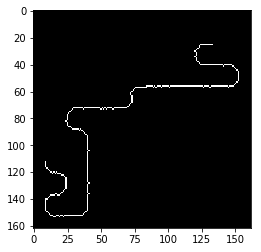

In [258]:
plt.imshow(path_image, cmap='gray')

In [248]:
path

[(112, 9),
 (113, 9),
 (114, 9),
 (115, 9),
 (116, 9),
 (117, 10),
 (118, 11),
 (119, 12),
 (120, 13),
 (121, 14),
 (120, 15),
 (121, 16),
 (120, 17),
 (121, 18),
 (121, 19),
 (121, 20),
 (122, 21),
 (122, 22),
 (123, 23),
 (124, 24),
 (125, 24),
 (126, 24),
 (127, 24),
 (128, 24),
 (129, 24),
 (130, 24),
 (131, 24),
 (132, 24),
 (133, 23),
 (134, 22),
 (135, 21),
 (136, 20),
 (137, 19),
 (137, 18),
 (136, 17),
 (136, 16),
 (137, 15),
 (137, 14),
 (137, 13),
 (138, 12),
 (139, 11),
 (140, 10),
 (140, 9),
 (141, 9),
 (142, 9),
 (143, 9),
 (144, 9),
 (145, 9),
 (146, 9),
 (147, 9),
 (148, 9),
 (149, 10),
 (150, 11),
 (151, 12),
 (152, 13),
 (152, 14),
 (153, 15),
 (153, 16),
 (152, 17),
 (152, 18),
 (153, 19),
 (152, 20),
 (152, 21),
 (153, 22),
 (152, 23),
 (152, 24),
 (152, 25),
 (152, 26),
 (152, 27),
 (152, 28),
 (152, 29),
 (152, 30),
 (152, 31),
 (152, 32),
 (152, 33),
 (152, 34),
 (152, 35),
 (152, 36),
 (151, 37),
 (150, 38),
 (149, 39),
 (148, 40),
 (147, 40),
 (146, 40),
 (145,

In [144]:
size = np.size(maze)

skel = np.zeros(maze.shape, np.uint8)

ret, maze = cv.threshold(maze, 100, 255, 0)

element = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))

while True:
    
    eroded = cv.erode(maze,element)

    temp = cv.dilate(eroded, element)

    temp = cv.subtract(maze, temp)

    skel = cv.bitwise_or(skel, temp)

    maze = eroded.copy()
    
    zeros = size - cv.countNonZero(maze)
    if zeros == size:
        break




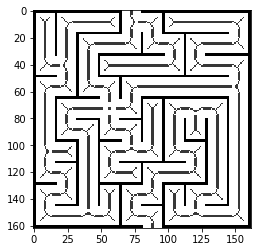

In [145]:
new_maze = maze_original + 200*skel
plt.imshow(new_maze, cmap='gray')

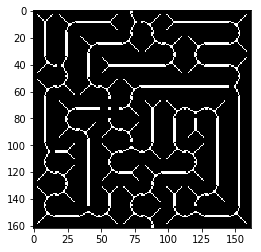

In [112]:
plt.imshow(skel, cmap='gray')

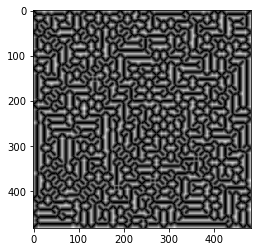

In [124]:
plt.imshow(test, cmap= 'gray')

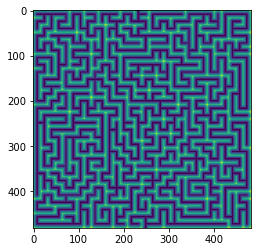

In [44]:
plt.imshow(new_maze)

In [48]:
obstacles

(array([  0,   0,   0, ..., 481, 481, 481]),
 array([  0,   1,   2, ..., 479, 480, 481]))

In [49]:
test[obstacles] 

array([11.313708, 10.630146, 10.      , ..., 10.      , 10.630146,
       11.313708], dtype=float32)

In [51]:
maze[obstacles] = 255

In [60]:
new_maze = test 
new_maze[obstacles] = 255

In [61]:
type(new_maze)

numpy.ndarray

In [62]:
new_maze

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

In [66]:
new_maze.min()

255.0

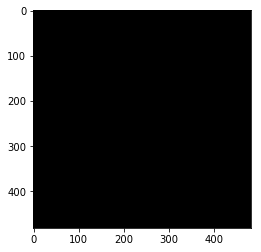

In [65]:
plt.imshow(new_maze, cmap = 'gray')

True